# Logistic Regression


Loading Important Library


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading of Dataset and EDA

In [92]:
df=pd.read_csv("diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
df.shape

(768, 9)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visulation

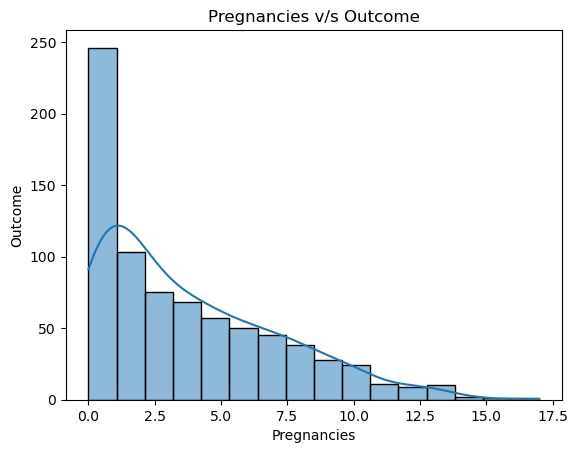

In [97]:
sns.histplot(data=df, x='Pregnancies',  kde=True)

plt.title('Pregnancies v/s Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.show()

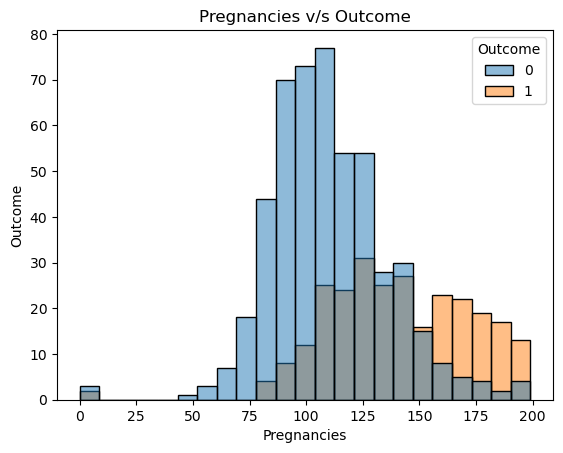

In [98]:
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=False)
plt.title('Pregnancies v/s Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.show()

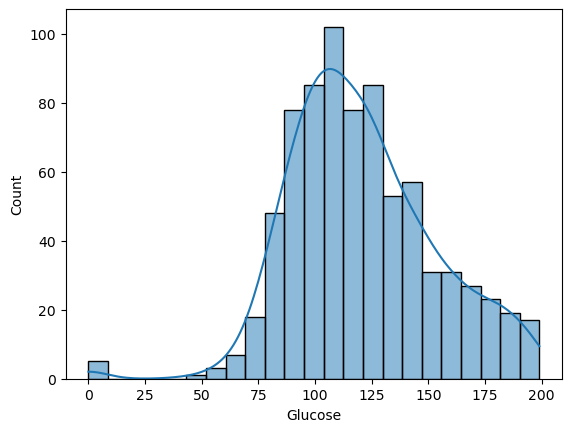

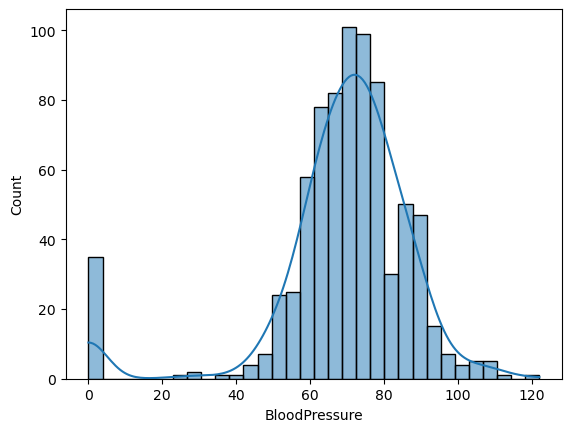

In [99]:
sns.histplot(df['Glucose'],kde=True)
plt.show()
sns.histplot(df['BloodPressure'],kde=True)
plt.show()

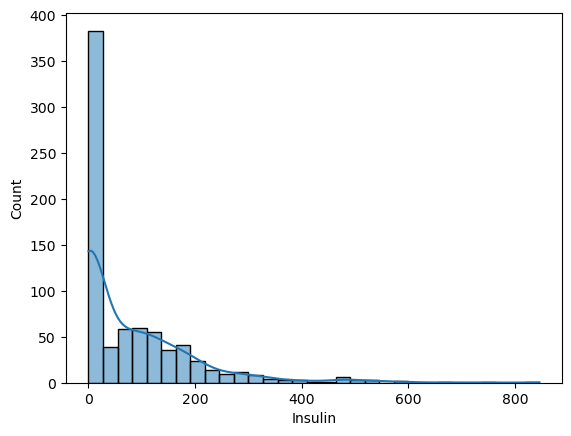

In [100]:
sns.histplot(df['Insulin'],kde=True)
plt.show()

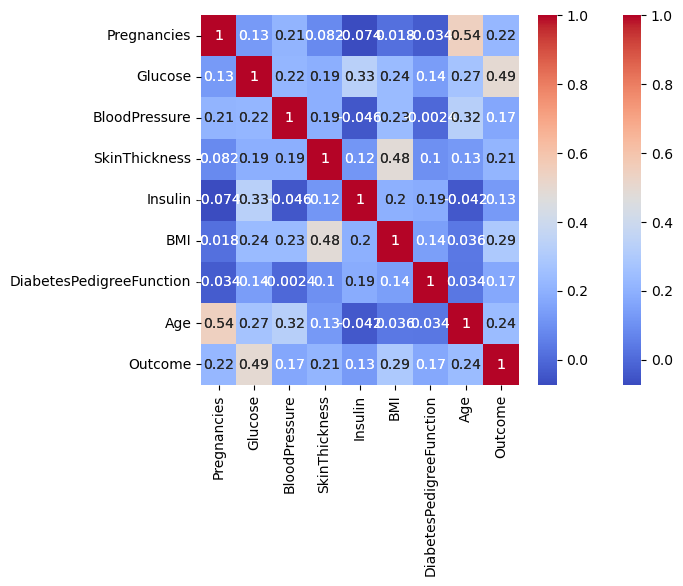

In [126]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

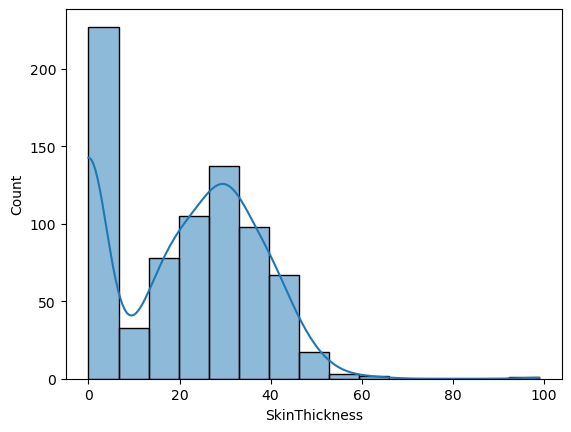

In [101]:
sns.histplot(df['SkinThickness'],kde=True)
plt.show()

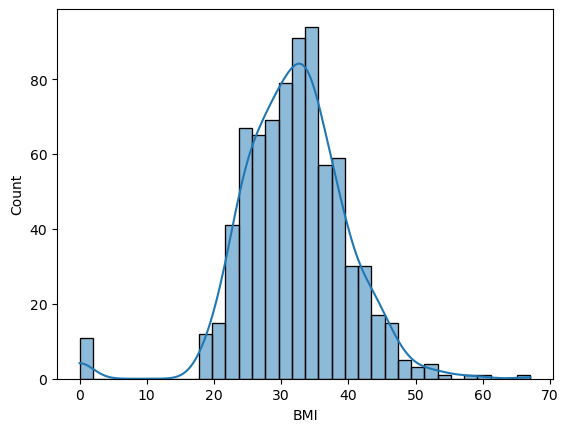

In [102]:
sns.histplot(df['BMI'],kde=True)
plt.show()

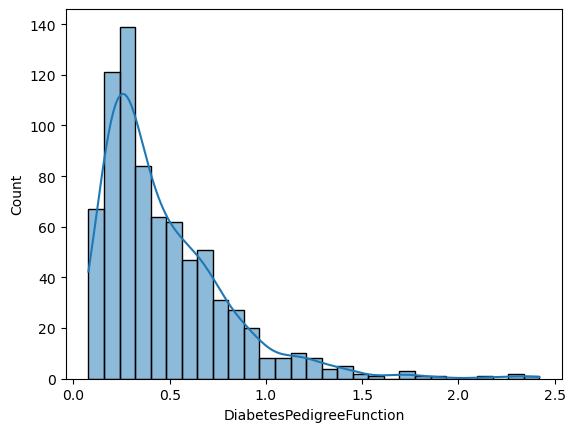

In [103]:
sns.histplot(df['DiabetesPedigreeFunction'],kde=True)
plt.show()

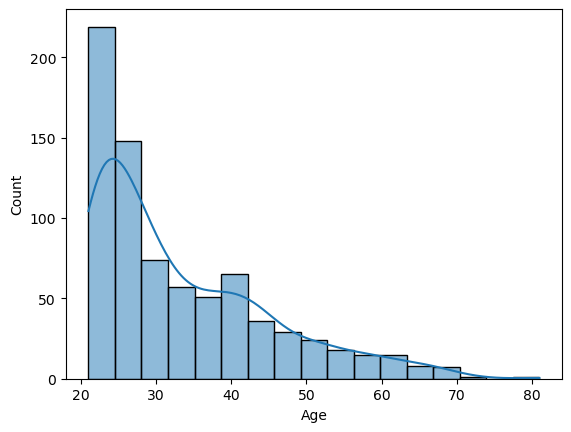

In [135]:
sns.histplot(df['Age'],kde=True)
plt.show()


In [105]:
x=df['DiabetesPedigreeFunction'].isnull().sum()
x

np.int64(0)

In [106]:
Pregnancies_x=df[df['Pregnancies']==0].value_counts().sum()
Glucose_x=df[df['Glucose']==0].value_counts().sum()
BloodPressure_x=df[df['BloodPressure']==0].value_counts().sum()
SkinThickness_x=df[df['SkinThickness']==0].value_counts().sum()
print()
Pregnancies_x

np.int64(111)

In [107]:
col=['Pregnancies','Glucose','BloodPressure','SkinThickness']
for i in col:
    print(i,(df[i]==0).sum())

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227


In [108]:
col=['Glucose','BloodPressure','SkinThickness']
for i in col:
    print(i,df[i].median())

Glucose 117.0
BloodPressure 72.0
SkinThickness 23.0


# Replaced Zero's values with mean 

In [109]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness']
df[cols] = df[cols].replace(0, np.nan)
df[cols] = df[cols].fillna(df[cols].median())

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Training the Data 

In [132]:
X=df.drop(columns=['Outcome'],axis=1)


y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7012987012987013

Confusion Matrix:
 [[81 19]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [124]:

importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_[0]
})

importance = importance.sort_values(by='Weight', ascending=False)
print(importance)

                    Feature    Weight
1                   Glucose  1.190490
5                       BMI  0.630950
0               Pregnancies  0.366104
6  DiabetesPedigreeFunction  0.263828
7                       Age  0.120198
3             SkinThickness  0.096623
2             BloodPressure -0.017095
4                   Insulin -0.137298


In [114]:
print(X.shape)
print(y.shape)


(768, 8)
(768,)


In [127]:
corr = df.corr()
corr['Outcome'].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.492782
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.130548
Name: Outcome, dtype: float64